In [8]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [1]:
class DeployedModel(object):
    def __init__(self, path_to_model):
        self.detection_graph = tf.Graph()
        with self.detection_graph.as_default():
            od_graph_def = tf.GraphDef()
            # Works up to here.
            with tf.gfile.GFile(path_to_model, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')
            self.image_tensor = self.detection_graph.get_tensor_by_name('image_tensor:0')
            self.d_boxes = self.detection_graph.get_tensor_by_name('detection_boxes:0')
            self.d_scores = self.detection_graph.get_tensor_by_name('detection_scores:0')
            self.d_classes = self.detection_graph.get_tensor_by_name('detection_classes:0')
            self.num_d = self.detection_graph.get_tensor_by_name('num_detections:0')
        self.sess = tf.Session(graph=self.detection_graph)
    
    def predict(self, img):
        # Bounding Box Detection.
        with self.detection_graph.as_default():
            # Expand dimension since the model expects image to have shape [1, None, None, 3].
            img_expanded = np.expand_dims(img, axis=0)  
            (boxes, scores, classes, num) = self.sess.run(
                [self.d_boxes, self.d_scores, self.d_classes, self.num_d],
                feed_dict={self.image_tensor: img_expanded})
        return boxes, scores, classes, num
    


In [28]:
def draw_bounding_boxes(img, boxes, scores, classes, threshold = 0.1):
    img_copy = np.array(img)
    img_size = img.size
    for i, box in enumerate(boxes[0]):
        if scores[0][i] >= threshold:
            cv2.rectangle(img_copy,
                (int(box[1] * img_size[0]), int(box[0] * img_size[1])),
                (int(box[3] * img_size[0]), int(box[2] * img_size[1])),
                (0,255,0))
    return img_copy

In [6]:
D = DeployedModel("export/frozen_inference_graph.pb")


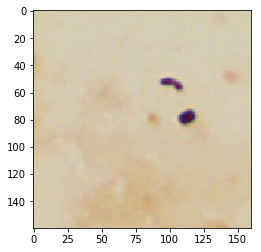

In [5]:
img = Image.open("../../../data/images/adjusted/segmented/1_0000_0000.JPG")
plt.imshow(img)

In [10]:
boxes, scores, classes, num = D.predict(img)

In [27]:
print(scores[0])

[ 0.05221449  0.03826071  0.03208167  0.03153662  0.02810484  0.02773206
  0.02555017  0.02515446  0.02421933  0.02311803  0.02108611  0.02099272
  0.02066787  0.02060007  0.01963248  0.01915266  0.01791956  0.01788784
  0.01754771  0.01706775  0.01705056  0.01680096  0.01636134  0.016125
  0.01584318  0.01551666  0.01544636  0.0154168   0.01494348  0.01434231
  0.01425896  0.01422123  0.01338605  0.01314044  0.01310444  0.01283841
  0.01273448  0.01264961  0.01253914  0.01251283  0.01242406  0.01240819
  0.01225696  0.01216425  0.01195443  0.01182668  0.01180651  0.01173978
  0.01156555  0.01151707  0.01151701  0.01148261  0.0114178   0.011306
  0.01129889  0.01128099  0.01121931  0.01119852  0.01111853  0.01086475
  0.01079339  0.01073917  0.010547    0.01043982  0.01038201  0.01028948
  0.01027853  0.01025908  0.01023676  0.01020483  0.01007948  0.00996547
  0.00969472  0.00949988  0.00942629  0.00923272  0.00906491  0.00899931
  0.00899077  0.00897457  0.00893834  0.00881237  0.008

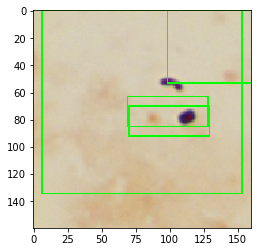

In [31]:
plt.imshow(draw_bounding_boxes(img, boxes, scores, classes, 0.03))